# Evaluate the Harmony question matcher using the existing McElroy et al harmonisation tool as a gold standard

This is a validation of Harmony against the questionnaire harmonisation tool developed by McElroy et al in 2020.

You can read in detail about the validation report here:

https://harmonydata.org/measuring-the-performance-of-nlp-algorithms/

You can read an explanation of the technologies evaluated here:

https://harmonydata.org/how-does-harmony-work/

In [1]:
MODEL_NAME = "Model 4: Spacy Large Monolingual Word Vectors"

import sys
sys.path.append("../front_end")
from utils.question_matcher_spacy_lg import QuestionMatcherSpacyLgEnglishOnly
qm = QuestionMatcherSpacyLgEnglishOnly()
match_function = lambda question_dfs : qm.match_questions(question_dfs)

In [2]:
from IPython.display import display, HTML
import bz2
import os
import pickle as pkl
import re
import sys
from nltk.corpus import stopwords
from langdetect import detect
import numpy as np
import operator 
import pandas as pd
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

from utils.spacy_wrapper import get_spacy_model

pd.set_option("max_colwidth", None)
pd.set_option("max_seq_items", None)

In [3]:
INPUT_FILE = "../data/Final harmonised item tool EM.xlsx"


In [4]:
def normalise_question(original_text: str):
    """
    Checks if two questions have identical text.
    This is because they are by definition equivalent even if they are in different columns in the harmonisation tool by McElroy et al.
    """
    return re.sub(r'\W', '', original_text.lower())

In [5]:
validation_data = {}

for sheet_name in ("Childhood","Adulthood"):

    df = pd.read_excel(INPUT_FILE, sheet_name=sheet_name)

    if sheet_name == "Adulthood":
        labels_in_this_sheet = ["Adulthood"] * len(df)
        df = df[df.columns[4:]]
    else:
        labels_in_this_sheet = list(df["Developmental period"])
        df = df[df.columns[5:]]

    all_questions = []
    category_to_id = {}
    for idx in range(0, len(df)):
        questions_in_survey = []
        for column in df.columns:
            cell_content = df[column].iloc[idx]
            if type(cell_content) is str:
                for text in cell_content.split("/"):
                    text = re.sub(r'[^A-Za-z -,]', '', text.strip()).strip()
                    category = column.strip()
                    if category not in category_to_id:
                        category_to_id[category] = len(category_to_id)
                    category_id = category_to_id[category]
                    if len(text) > 2:
                        
                        questions_in_survey.append((text, category_id, normalise_question(text)))
        all_questions.append(questions_in_survey)
    
    validation_data[sheet_name] = all_questions

In [6]:
validation_data["GAD-7"] = [[], []]
for en, pt in zip("""Feeling nervous, anxious, or on edge
Not being able to stop or control worrying
Worrying too much about different things
Trouble relaxing
Being so restless that it is hard to sit still
Becoming easily annoyed or irritable
Feeling afraid, as if something awful might happen""".split("\n"),
"""Sentir-se nervoso/a, ansioso/a ou muito tenso/a
Não ser capaz de impedir ou de controlar as preocupações
Preocupar-se muito com diversas coisas
Dificuldade para relaxar
Ficar tão agitado/a que se torna difícil permanecer sentado/a
Ficar facilmente aborrecido/a ou irritado/a
Sentir medo como se algo horrível fosse acontecer""".split("\n")
                 ):
    validation_data["GAD-7"][0].append((en, en, normalise_question(en)))
    validation_data["GAD-7"][1].append((pt, en, normalise_question(pt)))

Validating on dataset Childhood
	Processing 47 instruments of average length 23 questions each
	Calculated 562315 match scores
	Generated 40708 gold-standard values to compare them to
	Calculating ROC curve

FALSE NEGATIVES OR WEAKEST MATCHES Childhood



,Instrument 1,Instrument 2,Score from model,Ground truth
0,"yes, occasionally",Truants from school,0.22,1
1,Is Disobedient,"frequently cribs""",0.26,1
2,Is Disobedient,sometimes cribs,0.26,1
3,"Inattentive, easily distracted",average concentration,0.31,1
4,Bites nails,Has a stutter or stammer,0.32,1
5,Is Inattentive,average concentration,0.34,1
6,She is always on the go,"Squirmy, fidgety child",0.34,1
7,Sometimes late,Truants from school,0.34,1
8,Fails to finish things he,average concentration,0.35,1
9,"Never "" or ""Never late unless with good reason",Truants from school,0.36,1



FALSE POSITIVES OR WEAKEST REJECTIONS Childhood



,Instrument 1,Instrument 2,Score from model,Ground truth
0,Cannot settle to anything for more than a few moments,Child cannot settle to do anything for more than a few moments,0.99,0
1,I laughed a lot,I cried a lot,0.97,0
2,"A quarrelsome and aggressive child"" or ""Takes a normal part in rough games","very anxious"" or ""Takes a normal part in rough games",0.97,0
3,Has Stutter or Stammer,Has a stutter or stammer,0.96,0
4,Gets on With Other Children,Gets on better with adults than with other children,0.96,0
5,"Tends to become unduly miserable or worried""","Tends to become unduly resentful"" or ""Seldom or never difficult to discipline",0.95,0
6,Child cannot settle to do anything for more than a few moments,Has difficulty in settling to anything for more than a few moments,0.95,0
7,Child destroys her own things or those belonging to others,Child takes things belonging to others,0.95,0
8,"usually gloomy and sad"" or ""Normal attitude to criticism and punishment","frequently disobedient"" or ""Normal attitude to criticism and punishment",0.95,0
9,I felt I was no good anymore,I felt so tired I just sat around and did nothing,0.95,0


Validating on dataset Adulthood
	Processing 28 instruments of average length 16 questions each
	Calculated 96017 match scores
	Generated 9580 gold-standard values to compare them to
	Calculating ROC curve

FALSE NEGATIVES OR WEAKEST MATCHES Adulthood



,Instrument 1,Instrument 2,Score from model,Ground truth
0,Did you have a lot of energy,exhaustion),0.33,1
1,Did you feel worn out,exhaustion),0.33,1
2,Did you feel full of life,exhaustion),0.34,1
3,Do you feel tired most of the time,exhaustion),0.35,1
4,Did you feel tired,exhaustion),0.36,1
5,I felt so tired I just sat around and did nothing,exhaustion),0.36,1
6,Do you often feel tired most of the time,exhaustion),0.37,1
7,exhaustion),Been feeling in need of a good tonic,0.37,1
8,"During the last days, about how often did you feel that everything was an effort",exhaustion),0.38,1
9,exhaustion),have there been days when you tired out very easily,0.38,1



FALSE POSITIVES OR WEAKEST REJECTIONS Adulthood



,Instrument 1,Instrument 2,Score from model,Ground truth
0,Have you been a happy person,Have you been a very nervous person,0.96,0
1,Have you felt so down in the dumps that nothing could cheer you up,"During the last days, about how often did you feel so depressed nothing could cheer you up",0.96,0
2,"During the last days, about how often did you feel so depressed nothing could cheer you up",Have you had times when you felt shaky or you heart pounded or you felt sweaty and you simply had to do something about it (rate panic attacks),0.96,0
3,Have you felt so down in the dumps that nothing could cheer you up,have you had the feeling that the future does not hold much for you,0.96,0
4,What is it like when you worry A round of painful thought which cannot be stopped and is out of proportion to the subject worried about (rate worrying),have you had the feeling that the future does not hold much for you,0.95,0
5,"During the last days, about how often did you feel so depressed nothing could cheer you up",Found at times you couldn't do anything because your nerves were too bad,0.95,0
6,have there been days when you found it difficult to get things done or had trouble getting started on things,Found at times you couldn't do anything because your nerves were too bad,0.95,0
7,"During the last days, about how often did you feel so depressed nothing could cheer you up",have there been days when you found it difficult to get things done or had trouble getting started on things,0.95,0
8,"During the last days, about how often did you feel so depressed nothing could cheer you up",have there been days when you tired out very easily,0.95,0
9,Have you had times when you felt shaky or you heart pounded or you felt sweaty and you simply had to do something about it (rate panic attacks),Found at times you couldn't do anything because your nerves were too bad,0.95,0


Validating on dataset GAD-7
Found GAD-7 Portuguese
	Processing 2 instruments of average length 7 questions each
	Calculated 49 match scores
	Generated 49 gold-standard values to compare them to
	Calculating ROC curve

FALSE NEGATIVES OR WEAKEST MATCHES GAD-7



,Instrument 1,Instrument 2,Score from model,Ground truth
0,Not being able to stop or control worrying,Não ser capaz de impedir ou de controlar as preocupações,0.01,1
1,Worrying too much about different things,Preocupar-se muito com diversas coisas,0.03,1
2,Being so restless that it is hard to sit still,Ficar tão agitado/a que se torna difícil permanecer sentado/a,0.04,1
3,Trouble relaxing,Dificuldade para relaxar,0.06,1
4,"Feeling afraid, as if something awful might happen",Sentir medo como se algo horrível fosse acontecer,0.07,1
5,Becoming easily annoyed or irritable,Ficar facilmente aborrecido/a ou irritado/a,0.28,1
6,"Feeling nervous, anxious, or on edge","Sentir-se nervoso/a, ansioso/a ou muito tenso/a",0.30,1



FALSE POSITIVES OR WEAKEST REJECTIONS GAD-7



,Instrument 1,Instrument 2,Score from model,Ground truth
0,Being so restless that it is hard to sit still,Ficar facilmente aborrecido/a ou irritado/a,0.35,0
1,"Feeling afraid, as if something awful might happen",Ficar facilmente aborrecido/a ou irritado/a,0.35,0
2,Not being able to stop or control worrying,Ficar facilmente aborrecido/a ou irritado/a,0.35,0
3,"Feeling nervous, anxious, or on edge",Ficar facilmente aborrecido/a ou irritado/a,0.32,0
4,"Feeling afraid, as if something awful might happen","Sentir-se nervoso/a, ansioso/a ou muito tenso/a",0.28,0
5,Worrying too much about different things,Ficar facilmente aborrecido/a ou irritado/a,0.26,0
6,Being so restless that it is hard to sit still,"Sentir-se nervoso/a, ansioso/a ou muito tenso/a",0.24,0
7,Trouble relaxing,Ficar facilmente aborrecido/a ou irritado/a,0.24,0
8,Not being able to stop or control worrying,"Sentir-se nervoso/a, ansioso/a ou muito tenso/a",0.23,0
9,Becoming easily annoyed or irritable,"Sentir-se nervoso/a, ansioso/a ou muito tenso/a",0.21,0


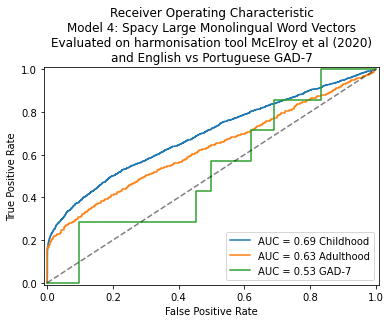

In [7]:
for dataset, dataset_data in validation_data.items():
    print (f"Validating on dataset {dataset}")
    question_dfs = []
    for questionnaire in dataset_data:
        df = pd.DataFrame({"question": [q for q, c, n in questionnaire]})
        df.attrs['language'] = "en"
        if dataset == "GAD-7" and "Sentir" in questionnaire[0][0]:
            df.attrs['language'] = "pt"
            print ("Found GAD-7 Portuguese")
        question_dfs.append(df)
    
    print (f"\tProcessing {len(question_dfs)} instruments of average length {int(np.round(np.mean([len(d) for d in question_dfs])))} questions each")
    matches = match_function(question_dfs)
    
    print (f"\tCalculated {len(matches)} match scores")
    
    pairs_already_seen = set()
    gold_standard = {}
    for i in range(len(dataset_data)):
        for j in range(i + 1, len(dataset_data)):
            for ii in range(len(dataset_data[i])):
                for jj in range(len(dataset_data[j])):
                    tup = tuple(sorted([dataset_data[i][ii][2], dataset_data[j][jj][2]]))
                    if tup not in pairs_already_seen:
                        gold_standard[(i, ii, j, jj)] = int(
                            (dataset_data[i][ii][1] == dataset_data[j][jj][1])
                            or 
                            (dataset_data[i][ii][2] == dataset_data[j][jj][2])
                        )
                    pairs_already_seen.add(tup)
    
    print (f"\tGenerated {len(gold_standard)} gold-standard values to compare them to")
    
    print ("\tCalculating ROC curve")
    
    y_pred = []
    y_test = []
    for m, g in gold_standard.items():
        y_pred.append(abs(matches.get(m, 0)))
        y_test.append(g)

    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)

    plt.plot(fpr, tpr, label = f'AUC = {roc_auc:0.2f} {dataset}')
    
    print (f"\nFALSE NEGATIVES OR WEAKEST MATCHES {dataset}\n")

    all_positives = [m for m in gold_standard if gold_standard[m] == 1 ]
    estimated_values_for_gt_1 = dict([(m,abs(matches[m])) for m in all_positives ])

    ctr = 0    
    examples = []
    for match_tuple, score_from_model in sorted(estimated_values_for_gt_1.items(), key=operator.itemgetter(1)):
        examples.append((question_dfs[match_tuple[0]].question.iloc[match_tuple[1]], question_dfs[match_tuple[2]].question.iloc[match_tuple[3]], np.round(score_from_model, 2)))

        ctr += 1
        if ctr > 10:
            break
    df_examples = pd.DataFrame({"Instrument 1":[e[0] for e in examples],"Instrument 2":[e[1] for e in examples],"Score from model":[e[2] for e in examples]})
    df_examples["Ground truth"] = 1
    display(df_examples)
    

    print (f"\nFALSE POSITIVES OR WEAKEST REJECTIONS {dataset}\n")

    all_negatives = [m for m in gold_standard if gold_standard[m] == 0 ]
    estimated_values_for_gt_1 = dict([(m,abs(matches[m])) for m in all_negatives ])

    ctr = 0
    examples = []
    for match_tuple, score_from_model in sorted(estimated_values_for_gt_1.items(), key=operator.itemgetter(1), reverse=True):
        examples.append((question_dfs[match_tuple[0]].question.iloc[match_tuple[1]], question_dfs[match_tuple[2]].question.iloc[match_tuple[3]], np.round(score_from_model, 2)))

        ctr += 1
        if ctr > 10:
            break
    df_examples = pd.DataFrame({"Instrument 1":[e[0] for e in examples],"Instrument 2":[e[1] for e in examples],"Score from model":[e[2] for e in examples]})
    df_examples["Ground truth"] = 0
    display(df_examples)

            
plt.title(f'Receiver Operating Characteristic\n{MODEL_NAME}\nEvaluated on harmonisation tool McElroy et al (2020)\nand English vs Portuguese GAD-7')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'--', color='black', alpha=0.5)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()